In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# read cvs file
import numpy as np
import pandas as pd

# Read the CSV file
df = pd.read_csv('data.csv', encoding='utf-8')

df.head(5)

,title,genre,country,movie_type,year,cert,seasons,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age,netflix_release,hulu_release,prime_video_release,disney_plus_release,production_budget,domestic_gross,worldwide_gross
0,#Alive,action,KR,MOVIE,2020,UR,0,98,6.3,38313,58.97,7.3,Unrated,t,f,f,f,5.124399e+07,4.761335e+07,1.242337e+08
1,#Alive,drama,KR,MOVIE,2020,UR,0,98,6.3,38313,58.97,7.3,Unrated,t,f,f,f,5.124399e+07,4.761335e+07,1.242337e+08
2,#Alive,horror,KR,MOVIE,2020,UR,0,98,6.3,38313,58.97,7.3,Unrated,t,f,f,f,5.124399e+07,4.761335e+07,1.242337e+08
3,#Alive,thriller,KR,MOVIE,2020,UR,0,98,6.3,38313,58.97,7.3,Unrated,t,f,f,f,5.124399e+07,4.761335e+07,1.242337e+08
4,#AnneFrank. Parallel Stories,documentation,IT,MOVIE,2019,UR,0,92,6.5,1548,8.19,7.1,Unrated,t,f,f,f,5.124399e+07,4.761335e+07,1.242337e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                8005 non-null   object 
 1   genre                8005 non-null   object 
 2   country              8005 non-null   object 
 3   movie_type           8005 non-null   object 
 4   year                 8005 non-null   int64  
 5   cert                 8005 non-null   object 
 6   seasons              8005 non-null   int64  
 7   runtime              8005 non-null   int64  
 8   imdb_score           8005 non-null   float64
 9   imdb_votes           8005 non-null   int64  
 10  tmdb_popularity      8005 non-null   float64
 11  tmdb_score           8005 non-null   float64
 12  age                  8005 non-null   object 
 13  netflix_release      8005 non-null   object 
 14  hulu_release         8005 non-null   object 
 15  prime_video_release  8005 non-null   o

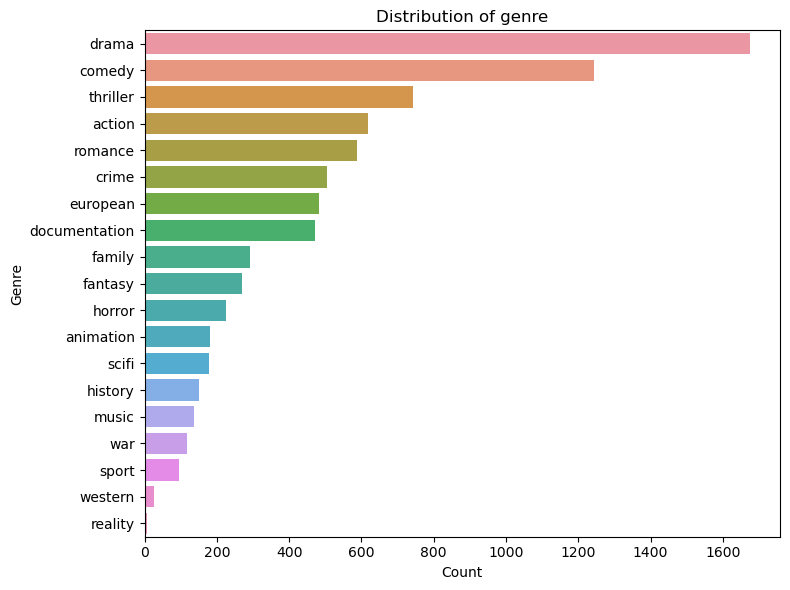

In [4]:
# Назва колонки для побудови графіку
col = 'genre'

# Побудова графіку
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Count')
plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

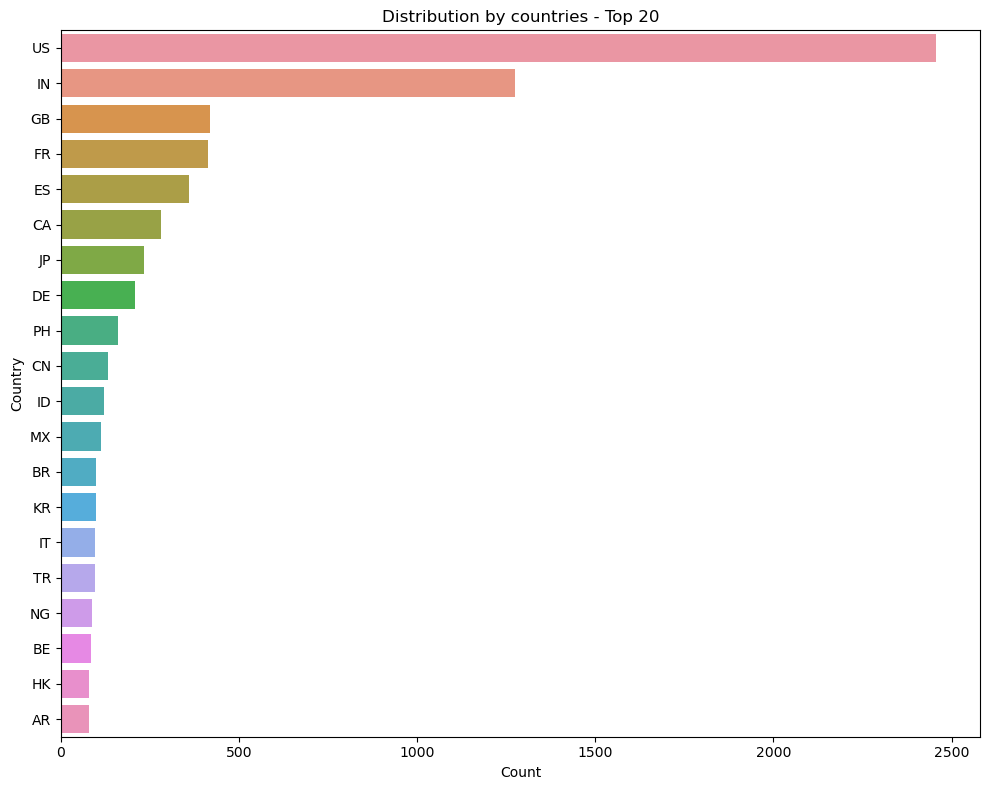

In [5]:
# Назва колонки для побудови графіку
col = 'country' 

# Визначення топ-20 країн
top_countries = df[col].value_counts().head(20).index

# Побудова графіку
plt.figure(figsize=(10, 8))
sns.countplot(y=col, data=df[df[col].isin(top_countries)], order=top_countries)
plt.title(f'Distribution by countries - Top 20')
plt.xlabel('Count')
plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()


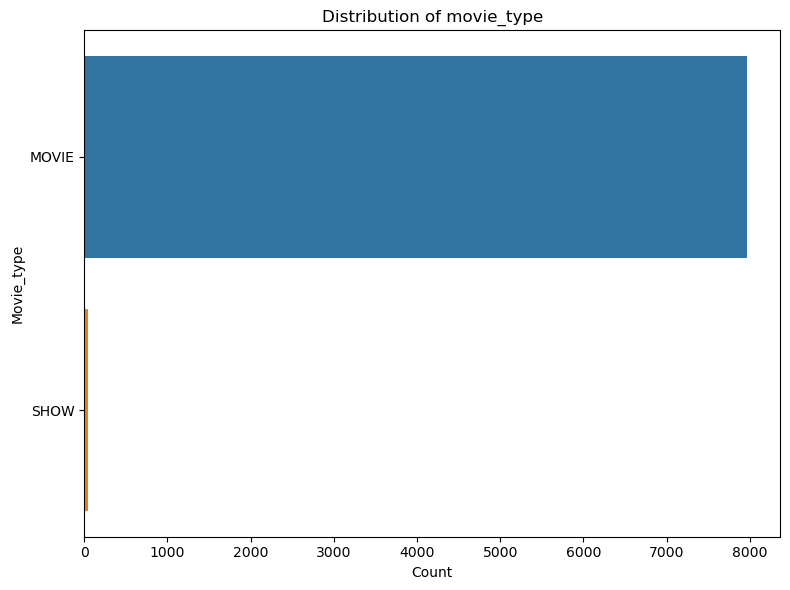

In [6]:
# Назва колонки для побудови графіку
col = 'movie_type'

# Побудова графіку
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Count')
plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

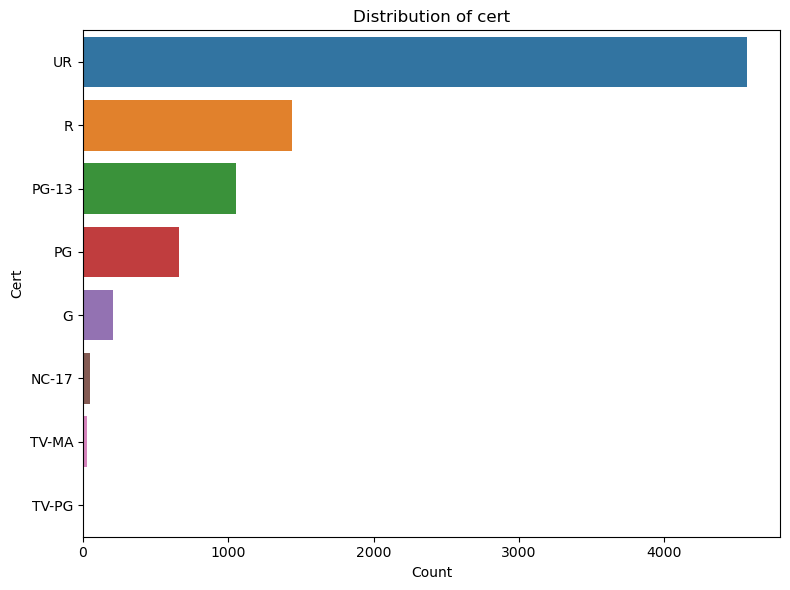

In [7]:
# Назва колонки для побудови графіку
col = 'cert'

# Побудова графіку
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Count')
plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

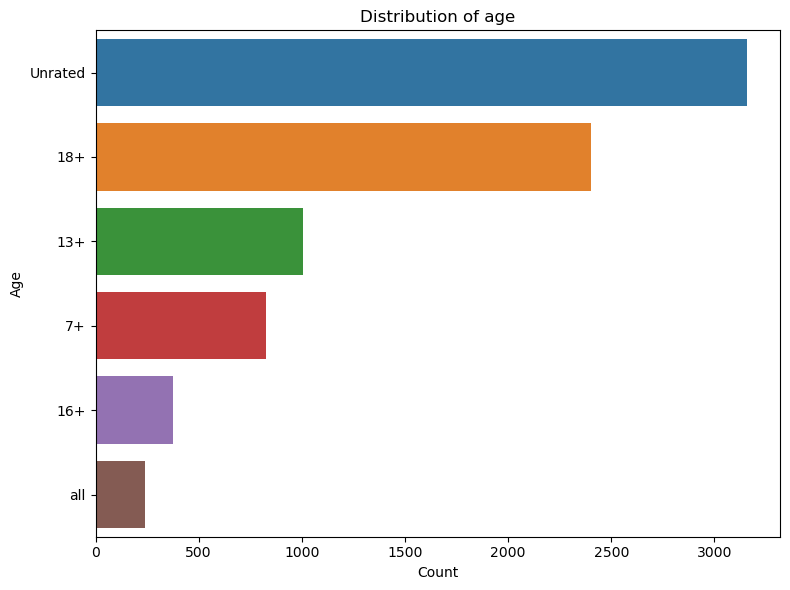

In [8]:
# Назва колонки для побудови графіку
col = 'age'

# Побудова графіку
plt.figure(figsize=(8, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Count')
plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

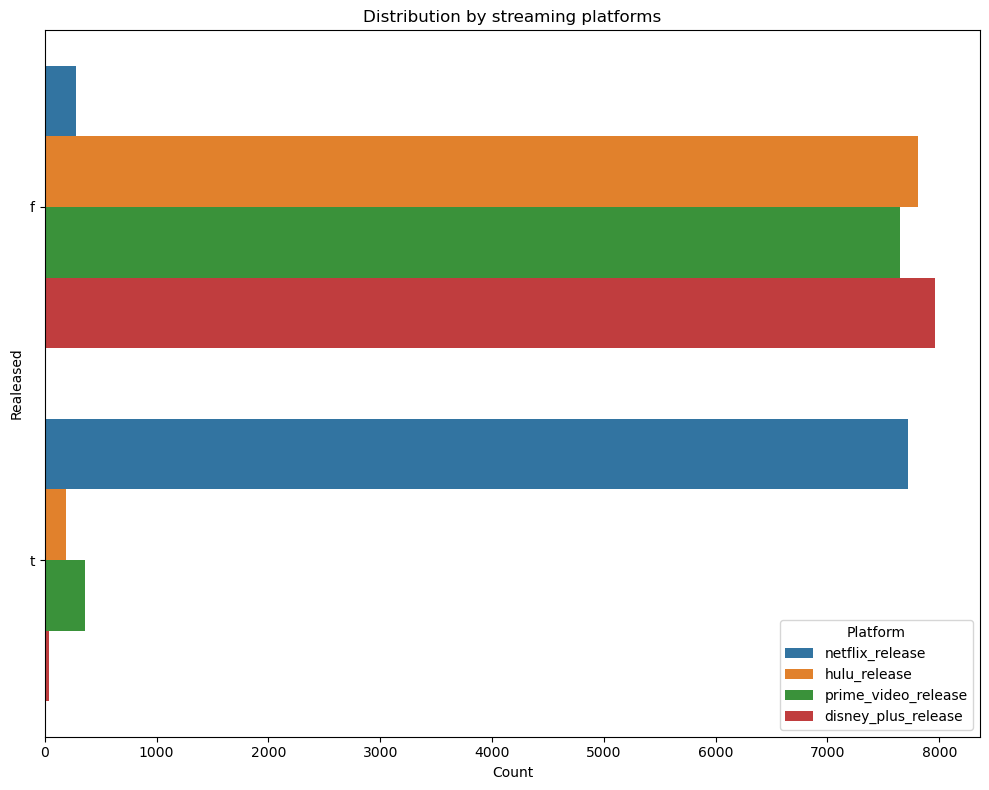

In [9]:
platforms = ['netflix_release', 'hulu_release', 'prime_video_release', 'disney_plus_release']

# Перетворення DataFrame
melted_df = pd.melt(df, id_vars=['title'], value_vars=platforms, var_name='platform', value_name='release_date')

# Побудова графіку
plt.figure(figsize=(10, 8))
sns.countplot(y='release_date', hue='platform', data=melted_df, order=melted_df['release_date'].value_counts().index)
plt.title('Distribution by streaming platforms')
plt.xlabel('Count')
plt.ylabel('Realeased')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


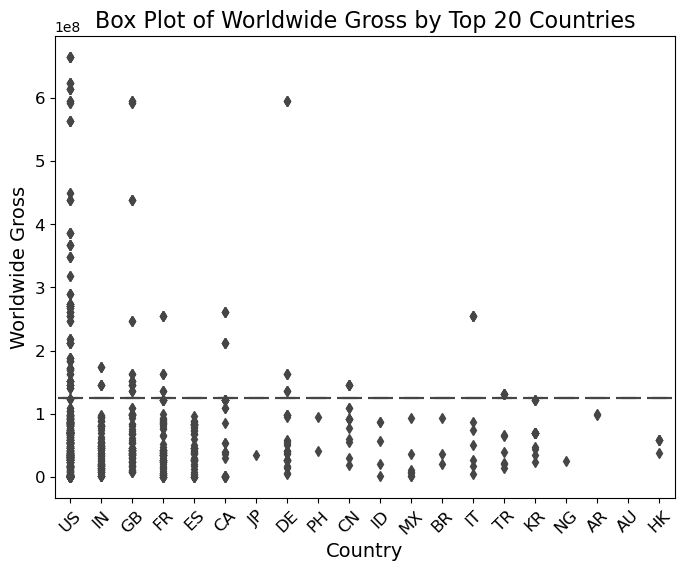

In [10]:
# Calculate total worldwide gross for each country
country_gross = df.groupby('country')['worldwide_gross'].sum().reset_index()

# Select top ten countries based on worldwide gross
top_ten_countries = country_gross.nlargest(20, 'worldwide_gross')['country']

# Filter the dataframe for top ten countries
df_top_ten = df[df['country'].isin(top_ten_countries)]

# Create box plot for top ten countries
plt.figure(figsize=(8, 6))
sns.boxplot(x='country', y='worldwide_gross', data=df_top_ten, order=top_ten_countries)
plt.title('Box Plot of Worldwide Gross by Top 20 Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Worldwide Gross', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

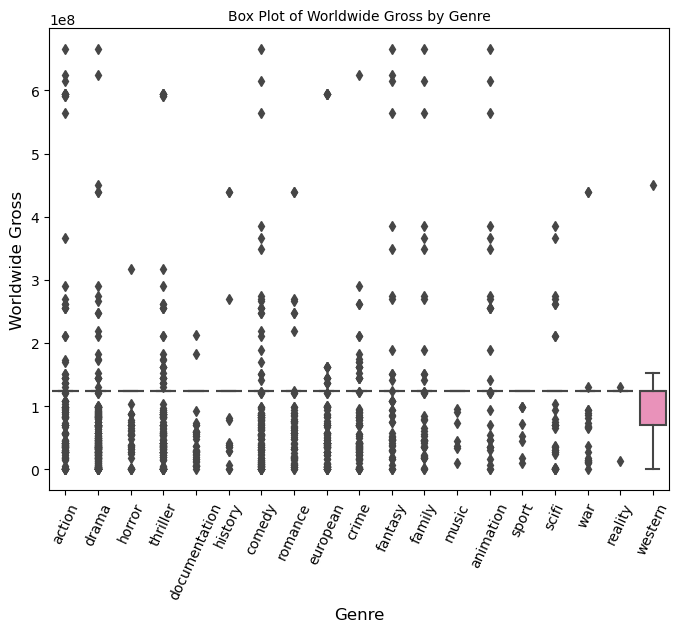

In [11]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='genre', y='worldwide_gross', data=df)
plt.title('Box Plot of Worldwide Gross by Genre', fontsize=10)  # Smaller title font size
plt.xlabel('Genre', fontsize=12)  # Smaller x-axis label font size
plt.ylabel('Worldwide Gross', fontsize=12)  # Smaller y-axis label font size
plt.xticks(rotation=65, fontsize=10)  # Smaller x-axis tick labels and rotate for better readability
plt.show()

In [12]:
# Виберіть лише числові стовпці
numeric_df = df.select_dtypes(include=[np.number])

# Обчисліть кореляційну матрицю
correlation_matrix = numeric_df.corr()

correlation_matrix

,year,seasons,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,production_budget,domestic_gross,worldwide_gross
year,1.000000,0.041561,-0.230265,-0.175509,-0.162488,0.061917,-0.002851,-0.036638,-0.078665,-0.050295
seasons,0.041561,1.000000,-0.139389,0.010291,-0.016264,0.248242,0.031892,0.002677,0.017080,-0.010880
runtime,-0.230265,-0.139389,1.000000,0.147778,0.200182,-0.003758,0.071282,0.002717,0.001490,0.017414
imdb_score,-0.175509,0.010291,0.147778,1.000000,0.244270,-0.023217,0.662921,-0.000023,0.048488,0.046243
imdb_votes,-0.162488,-0.016264,0.200182,0.244270,1.000000,0.196215,0.196074,0.133065,0.292411,0.300978
tmdb_popularity,0.061917,0.248242,-0.003758,-0.023217,0.196215,1.000000,0.079741,-0.012150,-0.009185,0.014942
tmdb_score,-0.002851,0.031892,0.071282,0.662921,0.196074,0.079741,1.000000,-0.011327,0.032456,0.026814
production_budget,-0.036638,0.002677,0.002717,-0.000023,0.133065,-0.012150,-0.011327,1.000000,0.568793,0.557724
domestic_gross,-0.078665,0.017080,0.001490,0.048488,0.292411,-0.009185,0.032456,0.568793,1.000000,0.861073
worldwide_gross,-0.050295,-0.010880,0.017414,0.046243,0.300978,0.014942,0.026814,0.557724,0.861073,1.000000


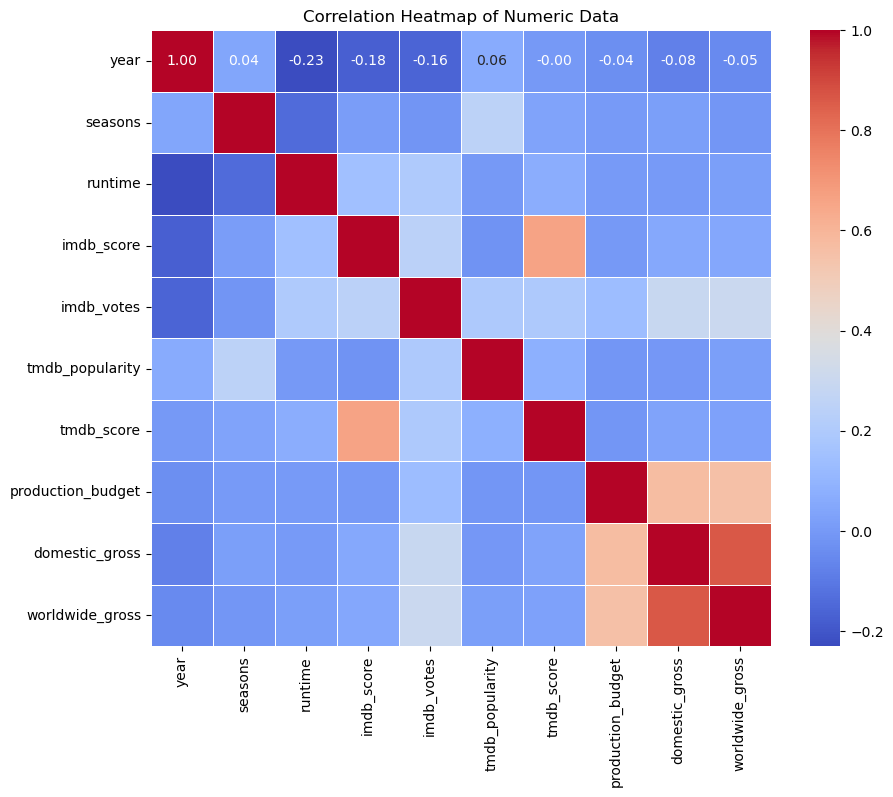

In [13]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Data')
plt.show()

In [14]:
def perform_anova(grouped_data):
    groups = {}
    for group, data in grouped_data:
        groups[group] = data['worldwide_gross']
    f_val, p_val = stats.f_oneway(*groups.values())
    return f_val, p_val

grouped_data = {
    'genre': df[['genre', 'worldwide_gross']].groupby(['genre']),
    'country': df[['country', 'worldwide_gross']].groupby(['country']),
    'cert': df[['cert', 'worldwide_gross']].groupby(['cert']),
    'age': df[['age', 'worldwide_gross']].groupby(['age']),
    'movie_type': df[['movie_type', 'worldwide_gross']].groupby(['movie_type']),
    'netflix_release': df[['netflix_release', 'worldwide_gross']].groupby(['netflix_release']),
    'hulu_release': df[['hulu_release', 'worldwide_gross']].groupby(['hulu_release']),
    'prime_video_release': df[['prime_video_release', 'worldwide_gross']].groupby(['prime_video_release']),
    'disney_plus_release': df[['disney_plus_release', 'worldwide_gross']].groupby(['disney_plus_release'])
}

for key, data in grouped_data.items():
    f_val, p_val = perform_anova(data)
    print(f"ANOVA results for {key}: F = {f_val}, P = {p_val}")

ANOVA results for genre: F = 2.7952367734077566, P = 7.023898863632492e-05
ANOVA results for country: F = 2.6204467451915683, P = 2.6553761231551637e-14
ANOVA results for cert: F = 17.268702855125667, P = 7.610443707359129e-23
ANOVA results for age: F = 22.433989178728886, P = 2.0612597717564114e-22
ANOVA results for movie_type: F = 1.1397287030718948, P = 0.28574186327769296
ANOVA results for netflix_release: F = 0.002781252478502649, P = 0.9579423114158859
ANOVA results for hulu_release: F = 5.172764362615605, P = 0.022970027991060852
ANOVA results for prime_video_release: F = 6.913748541632857, P = 0.008569906877612238
ANOVA results for disney_plus_release: F = 70.95245428749233, P = 4.2974317407040524e-17


In [15]:
# Select numeric columns except 'worldwide_gross'
numeric_columns = df.select_dtypes(include=[np.number]).drop(columns=['worldwide_gross', 'seasons', 'tmdb_popularity', 'tmdb_score', 'domestic_gross']).columns

# Виконайте ANOVA тест для кожної числової колонки
for column in numeric_columns:
    f_val, p_val = stats.f_oneway(*[group['worldwide_gross'] for name, group in df.groupby(column)])
    print(f"ANOVA results for {column}: F = {f_val}, P = {p_val}")

ANOVA results for year: F = 15.071790976147446, P = 2.338864106870952e-124
ANOVA results for runtime: F = 5.9061428709463195, P = 1.2899995163087835e-110
ANOVA results for imdb_score: F = 5.236116016138947, P = 1.4260183459888242e-40
ANOVA results for imdb_votes: F = 10.200644713683987, P = 0.0
ANOVA results for production_budget: F = 64.92279131777131, P = 0.0


In [16]:
all_features = pd.get_dummies(df[['imdb_votes', 'production_budget', 'worldwide_gross']])

all_features[['worldwide_gross']] = df[['worldwide_gross']]

df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=1
)
df_train.head()

,imdb_votes,production_budget,worldwide_gross
5244,9698,5.124399e+07,1.242337e+08
1851,6667,5.124399e+07,1.242337e+08
7308,139439,6.000000e+07,7.089378e+07
5913,305,5.124399e+07,1.242337e+08
3477,34,5.124399e+07,1.242337e+08


In [17]:
df_train.shape, df_test.shape

((6404, 3), (1601, 3))

In [18]:
x_train = df_train[['imdb_votes', 'production_budget']]
y_train = df_train['worldwide_gross']

x_test = df_test[['imdb_votes', 'production_budget']]
y_test = df_test['worldwide_gross']

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- Linear Regression
- Polynomial Regression
- Ridge Regression
- K-nearest Neighbors
- Random Forest

 <h3>Linear Regression</h3>


In [19]:
# Ініціалізація моделей
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [20]:
# Передбачення цільових значень для тестових даних
y_pred_linear = linear_reg.predict(x_test)

# Обчислення метрик
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = linear_reg.score(x_test, y_test)

# Виведення метрик
print(f'Linear Regression - MSE: {mse_linear}, R²: {r2_linear}')

Linear Regression - MSE: 1328424337930425.2, R²: 0.3472859614419338


C:\Users\oksan\AppData\Local\Temp\ipykernel_14568\3460227821.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(function, hist=False, label=label)
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\AppData\Local\Temp\ipykernel_14568\3460227821.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

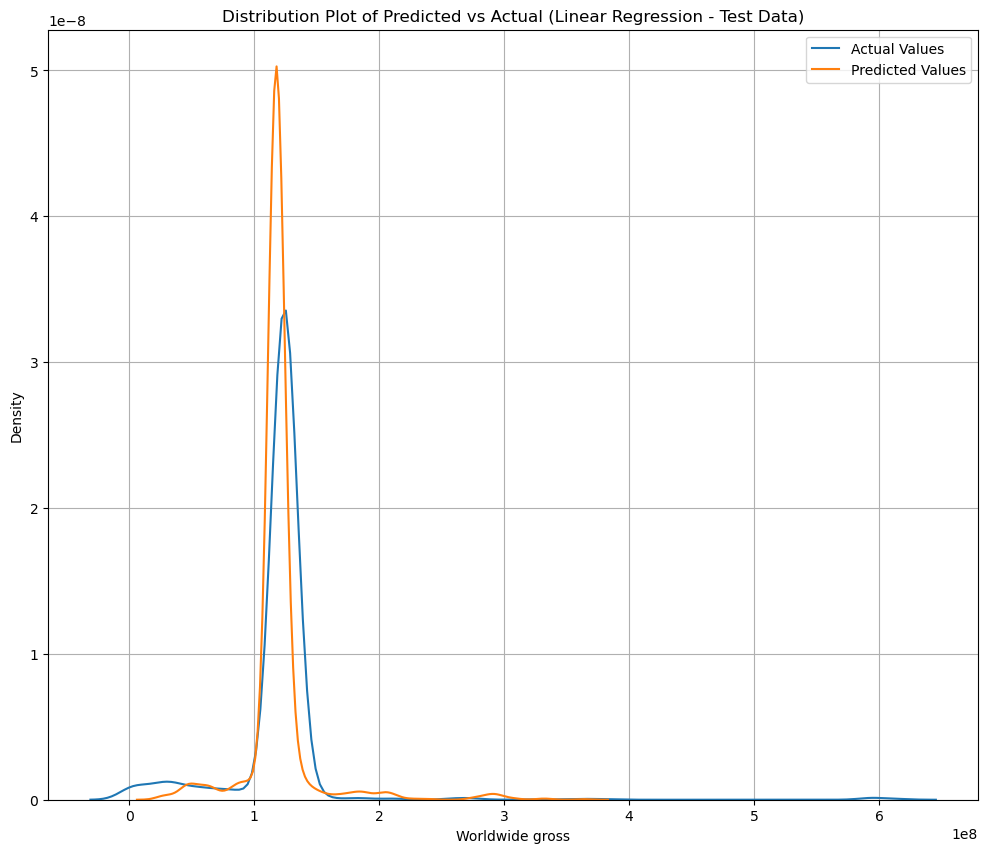

In [23]:
def DistributionPlot(*functions, labels=None, title=None):
    if labels is None or title is None:
        raise ValueError("Both 'labels' and 'title' must be provided as keyword arguments.")
    
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    for function, label in zip(functions, labels):
        sns.distplot(function, hist=False, label=label)

    plt.title(title)
    plt.xlabel('Worldwide gross')
#     plt.ylabel('density')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

# Creating the distribution plot for Linear Regression
Title_lr = 'Distribution Plot of Predicted vs Actual (Linear Regression - Test Data)'
DistributionPlot(y_test, y_pred_linear, labels=["Actual Values", "Predicted Values"], title=Title_lr)

 <h3>Polynomial Regression</h3>


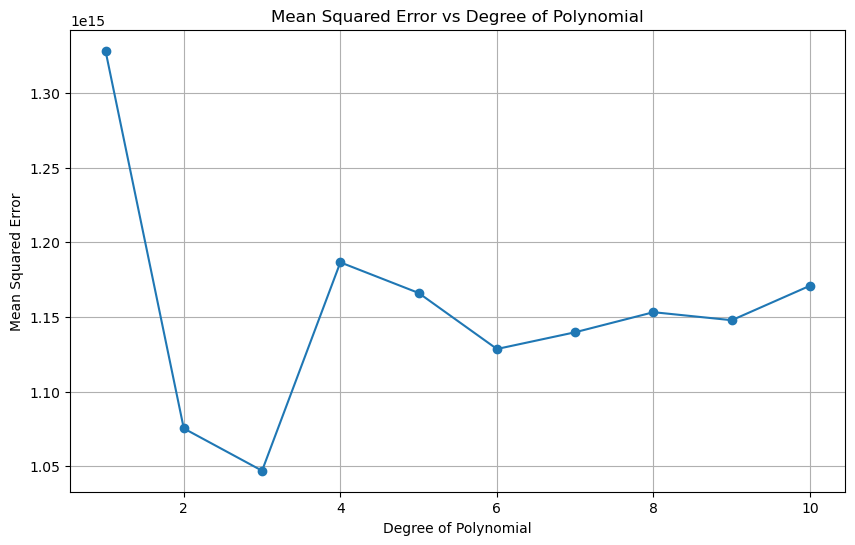

The best degree for Polynomial Regression is 3


In [24]:
# підберемо параметр поліноміальної регресії
degrees = range(1, 11)
mean_errors = []

# Loop over the range of degrees
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)
    
    # Create and train the model
    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    
    # Predict on the test set
    y_pred = poly_reg.predict(x_test_poly)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mean_errors.append(mse)

# Plot the mean squared errors for each degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_errors, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Degree of Polynomial')
plt.grid(True)
plt.show()

# Find the best degree
best_degree = degrees[np.argmin(mean_errors)]
print(f'The best degree for Polynomial Regression is {best_degree}')

In [25]:
# Polynomial regression with specified degree
poly_reg = PolynomialFeatures(degree=3)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)

# Train the model
linear_reg = LinearRegression()
linear_reg.fit(x_train_poly, y_train)

# Predict on the test set
y_pred = linear_reg.predict(x_test_poly)

print('Accuracy on test data:', linear_reg.score(x_test_poly, y_test))
print('Accuracy on train data:', linear_reg.score(x_train_poly, y_train))

Accuracy on test data: 0.4855838772512674
Accuracy on train data: 0.4807544476425534


In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = linear_reg.score(x_test_poly, y_test)

print(f'Polynomial Regression (Degree={best_degree}) - MSE: {mse}, R²: {r2}')

Polynomial Regression (Degree=3) - MSE: 1046956028083696.1, R²: 0.4855838772512674


C:\Users\oksan\AppData\Local\Temp\ipykernel_14568\3460227821.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(function, hist=False, label=label)
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\AppData\Local\Temp\ipykernel_14568\3460227821.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

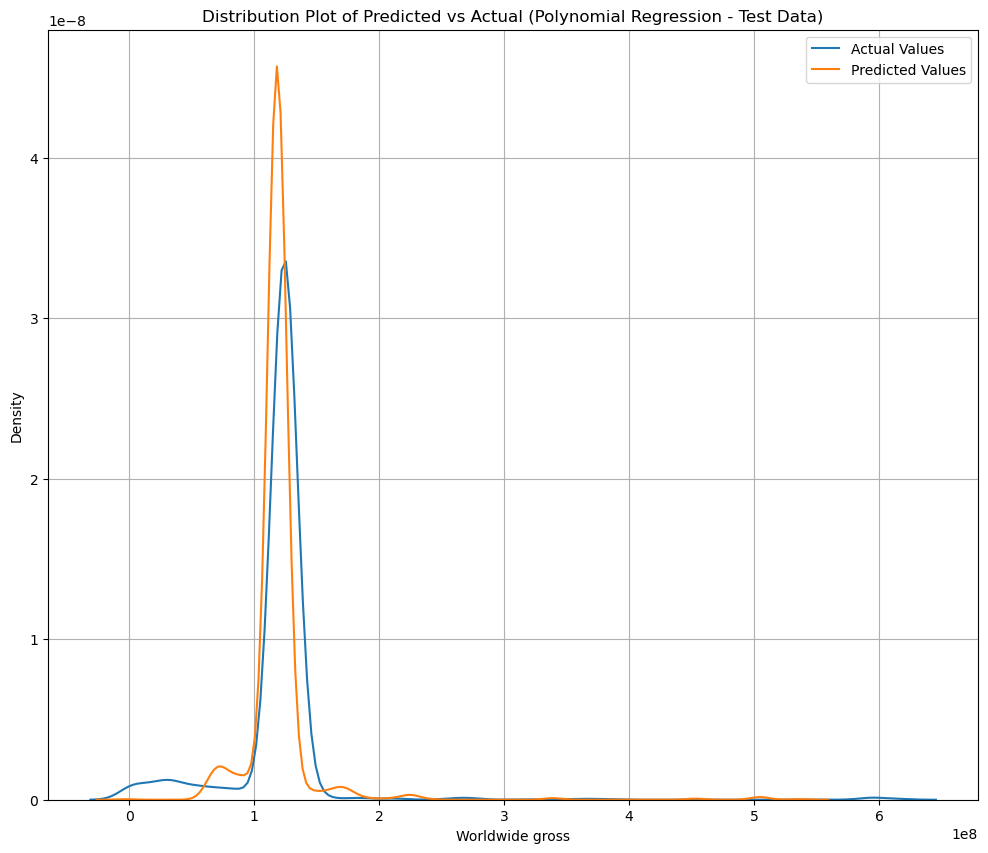

In [27]:
# Creating the distribution plot for Polynomial Regression
Title_poly = 'Distribution Plot of Predicted vs Actual (Polynomial Regression - Test Data)'
DistributionPlot(y_test, y_pred, labels=["Actual Values", "Predicted Values"], title=Title_poly)

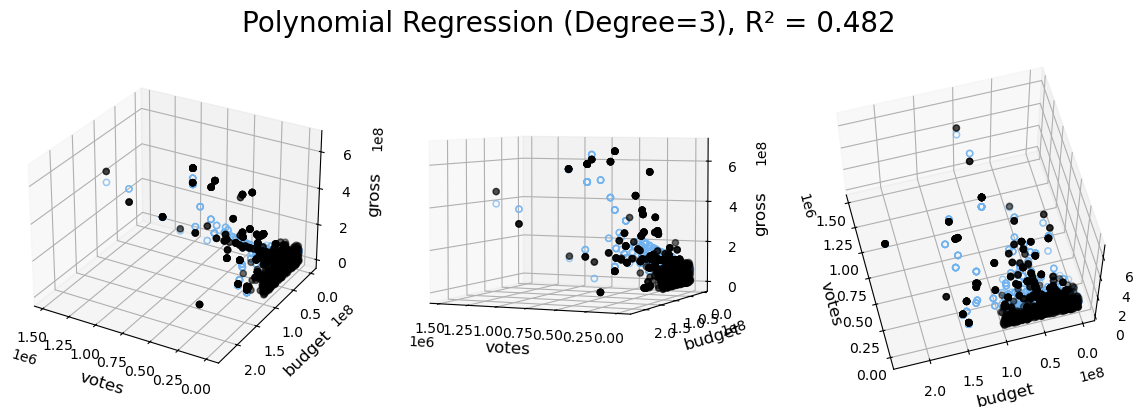

In [28]:
# Data preparation
X = df[['imdb_votes', 'production_budget']]
Y = df['worldwide_gross']

# Polynomial regression with degree 3
poly = PolynomialFeatures(degree=3)
Z_poly = poly.fit_transform(X)

# Train the model
lm = LinearRegression()
lm.fit(Z_poly, Y)

# Predict values
Y_hat = lm.predict(Z_poly)

# Evaluate model
r_squared = lm.score(Z_poly, Y)

# Plotting
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(X['imdb_votes'], X['production_budget'], Y, color='k', zorder=15)
    ax.scatter(X['imdb_votes'], X['production_budget'], Y_hat, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('votes', fontsize=12)
    ax.set_ylabel('budget', fontsize=12)
    ax.set_zlabel('gross', fontsize=12)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Polynomial Regression (Degree=3), R² = %.3f' % r_squared, fontsize=20)

plt.tight_layout()
plt.show()

 <h3>Ridge Regression</h3>


In [29]:
x_data = df[['imdb_votes', 'production_budget']]
y_data= df['worldwide_gross']


parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
RR=Ridge()
RR
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[['imdb_votes', 'production_budget']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [30]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000000)

In [31]:
alpha = Grid1.best_params_['alpha']
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(x_train, y_train)

Ridge
Ridge(alpha=alpha)

# Прогнозування
y_pred_ridge = ridge_reg.predict(x_test)

# Обчислення метрик
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_reg.score(x_test, y_test)

# Виведення метрик
print(f'Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}')

Ridge Regression - MSE: 1328424338604386.2, R²: 0.3472859611107867


In [32]:
print('Accuracy test data = ', ridge_reg.score(x_test, y_test))
print('Accuracy train data = ', ridge_reg.score(x_train, y_train))

Accuracy test data =  0.3472859611107867
Accuracy train data =  0.36674359686594127


C:\Users\oksan\AppData\Local\Temp\ipykernel_14568\3460227821.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(function, hist=False, label=label)
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\AppData\Local\Temp\ipykernel_14568\3460227821.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

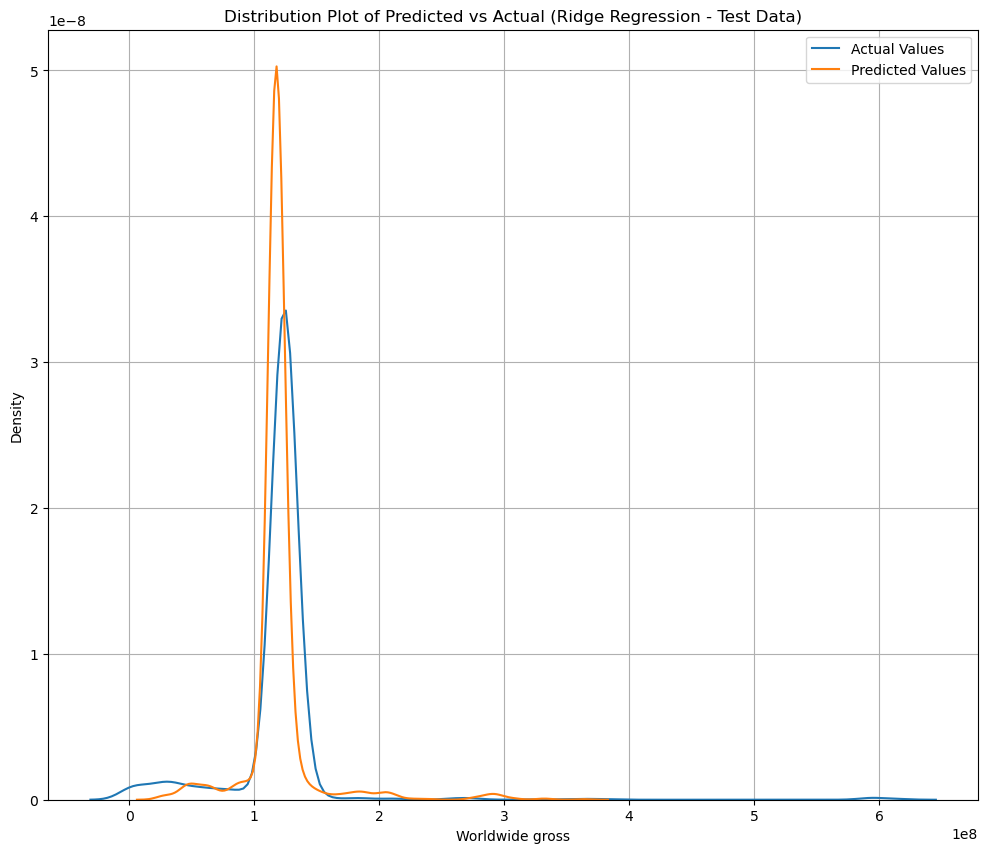

In [33]:
# Creating the distribution plot for Ridge Regression
Title_ridge = 'Distribution Plot of Predicted vs Actual (Ridge Regression - Test Data)'
DistributionPlot(y_test, y_pred_ridge, labels=["Actual Values", "Predicted Values"], title=Title_ridge)

<h2>Comparison оf models</h2>

C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

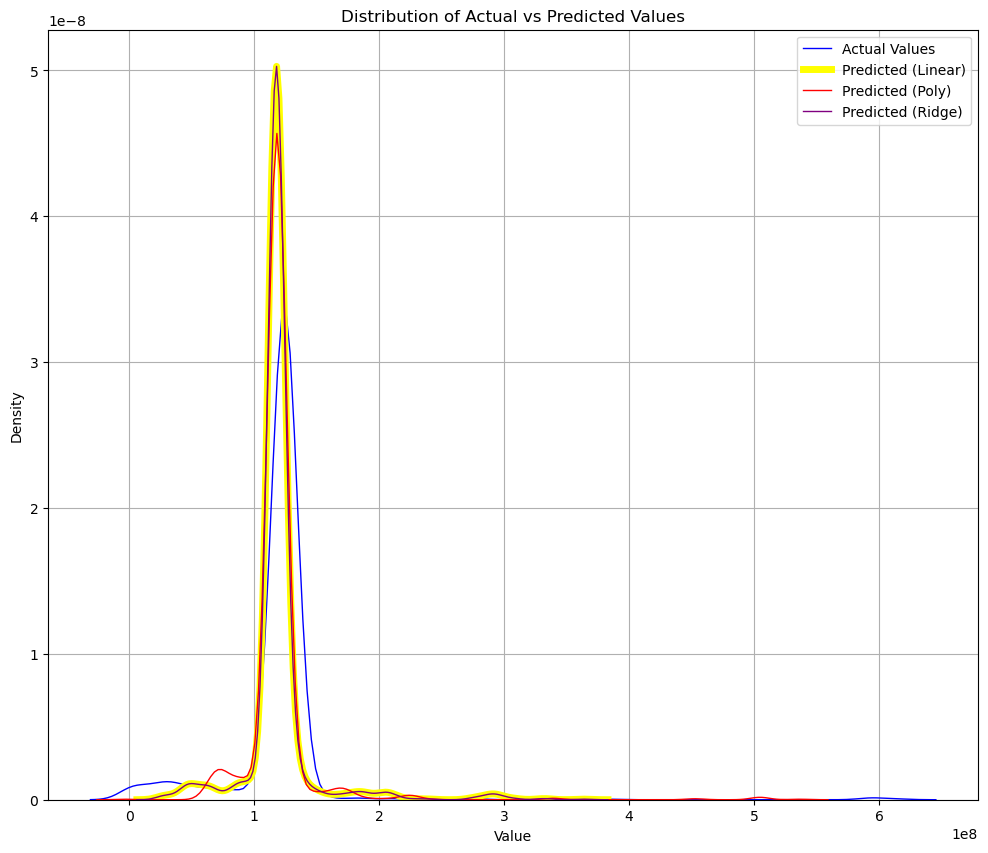

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def DistributionPlot(*functions, labels=None, title=None, linewidths=None, colors=None):
    if labels is None or title is None or linewidths is None or colors is None:
        raise ValueError("The 'labels', 'title', 'linewidths', and 'colors' must be provided as keyword arguments.")

    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    # Loop through functions, labels, linewidths, and colors, plotting each distribution
    for function, label, lw, color in zip(functions, labels, linewidths, colors):
        sns.kdeplot(function, label=label, linewidth=lw, color=color)

    plt.title(title)
    plt.xlabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (assuming you have y_test, y_pred_linear, etc.)
# Define labels for each model
labels = ["Actual Values", "Predicted (Linear)", "Predicted (Poly)", "Predicted (Ridge)"]

# Define linewidths for each model
linewidths = [1, 5, 1, 1]

# Define colors for each model
colors = ['blue', 'yellow', 'red', 'purple']

# Combine actual vs predicted values for each model
all_data = [y_test, y_pred_linear, y_pred, y_pred_ridge]

# Create the distribution plot with all models
DistributionPlot(*all_data, labels=labels, 
                 title="Distribution of Actual vs Predicted Values",
                 linewidths=linewidths, colors=colors)

 <h3>k-nearest neighbors</h3>


In [35]:
# # Визначення меж бінів та міток для категоризації бюджетів виробництва
# bins = [-float('inf'), 5000000, 10000000, 20000000, float('inf')]
# labels = ['Very Low', 'Low', 'Medium', 'High']

# # Створення нової категоріальної колонки 'budget_category' на основі бінінгу
# df['budget_category'] = pd.cut(df['production_budget'], bins=bins, labels=labels)

# Підготовка даних з усіма ознаками, включаючи 'budget_category'
all_features = pd.get_dummies(df[['imdb_votes', 'production_budget', 'worldwide_gross', 'country', 'year']])

# Розділення даних на навчальний та тестовий набори
df_train, df_test = train_test_split(
    all_features,
    test_size=0.2,
    random_state=1
)

# Вибір ознак та цільової змінної для навчання
x_train = df_train.drop(columns='worldwide_gross')
y_train = df_train['worldwide_gross']

# Вибір ознак та цільової змінної для тестування
x_test = df_test.drop(columns='worldwide_gross')
y_test = df_test['worldwide_gross']

In [36]:
# Define the bin edges and labels for categorizing production budgets
bins = [-float('inf'), 10000000, 20000000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create a new categorical column 'budget_category' based on the binning
df_train['gross_category'] = pd.cut(df_train['worldwide_gross'], bins=bins, labels=labels)
df_test['gross_category'] = pd.cut(df_test['worldwide_gross'], bins=bins, labels=labels)

# Drop the original 'production_budget' column
x_train = df_train.drop(columns=['worldwide_gross', 'gross_category'])
y_train = df_train['gross_category']

x_test = df_test.drop(columns=['worldwide_gross', 'gross_category'])
y_test = df_test['gross_category']

<p>Скористаюсь методом "ліктя" для визначення параметра кількості сусідів методу k-nearest neighbors </p>
<p>Для цього ініціалізую алгоритм з параметром від 1 до 100 і для кожної моделі порахую mean accuracy:</p>

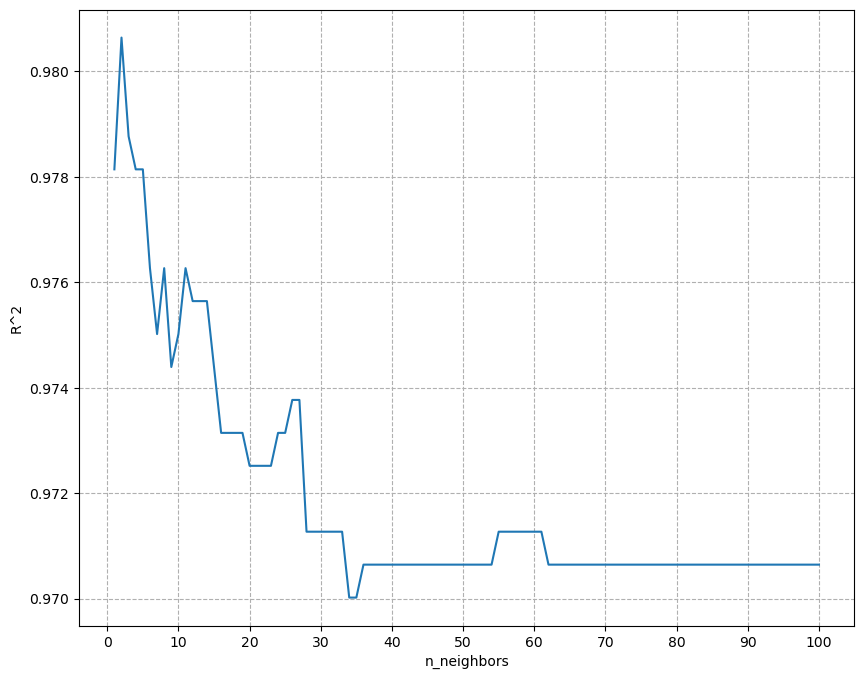

Найкраща точність: 0.9806371018113679, при n_neighbors = 2


In [37]:
accur = []
max_kernels = 100
for k in range(1, max_kernels + 1):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(x_train, y_train)
    accur.append(KNN_model.score(x_test, y_test))
    
# Отримані показники якості візуалізую на графіку:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,10))
plt.xlabel('n_neighbors')
plt.ylabel('R^2')
plt.grid(linestyle='--')
plt.show()

# Знаходимо найкращий показник точності та відповідне значення k
best_accuracy = max(accur)
best_k = accur.index(best_accuracy) + 1
print(f'Найкраща точність: {best_accuracy}, при n_neighbors = {best_k}')


In [38]:
# Навчання остаточної моделі з найкращим значенням k
KNN_model = KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [39]:
# Оцінка точності – найпростіший варіант оцінки роботи класифікатора
print('Accuracy test data = ', KNN_model.score(x_test, y_test))
print('Accuracy train data = ', KNN_model.score(x_train, y_train))

Accuracy test data =  0.9806371018113679
Accuracy train data =  0.9893816364772018


In [40]:
print(classification_report(y_test, KNN_model.predict(x_test)))

              precision    recall  f1-score   support

        High       0.99      1.00      0.99      1554
         Low       0.79      0.63      0.70        30
      Medium       0.50      0.18      0.26        17

    accuracy                           0.98      1601
   macro avg       0.76      0.60      0.65      1601
weighted avg       0.98      0.98      0.98      1601



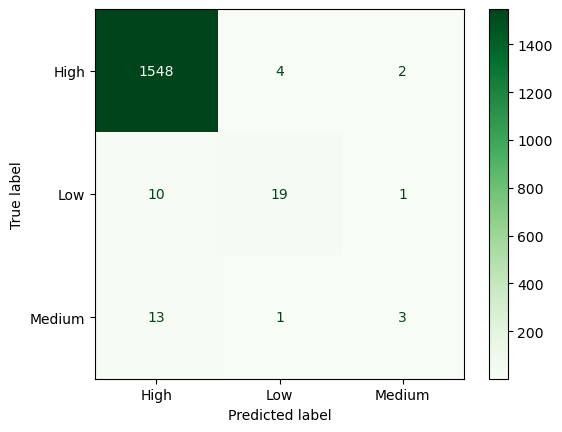

In [41]:
ConfusionMatrixDisplay.from_estimator(KNN_model, x_test, y_test, cmap="Greens")
plt.grid(False)
plt.show()

In [42]:
# Перетворення категорій на числові значення
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_knn_encoded = le.transform(KNN_model.predict(x_test))

# Обчислення MSE та R²
mse_knn = mean_squared_error(y_test_encoded, y_pred_knn_encoded)
r2_knn = KNN_model.score(x_test, y_test)

print(f'K-Nearest Neighbors MSE: {mse_knn}')
print(f'K-Nearest Neighbors R²: {r2_knn}')

K-Nearest Neighbors MSE: 0.047470331043098064
K-Nearest Neighbors R²: 0.9806371018113679


In [43]:
label_encoders = {}
for column in x_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    x_train[column] = label_encoders[column].fit_transform(x_train[column])
    x_test[column] = label_encoders[column].transform(x_test[column])


KNN_model = KNeighborsClassifier(n_neighbors=2)
cv = KFold(n_splits=3, shuffle=True, random_state=1)
cv_scores = cross_val_score(KNN_model, x_train, y_train, cv=cv, scoring='accuracy')

# Виведемо середні значення метрик
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std()}")

Mean Cross-Validation Accuracy: 0.9786078267403263
Standard Deviation of Cross-Validation Accuracy: 0.003248896747581231


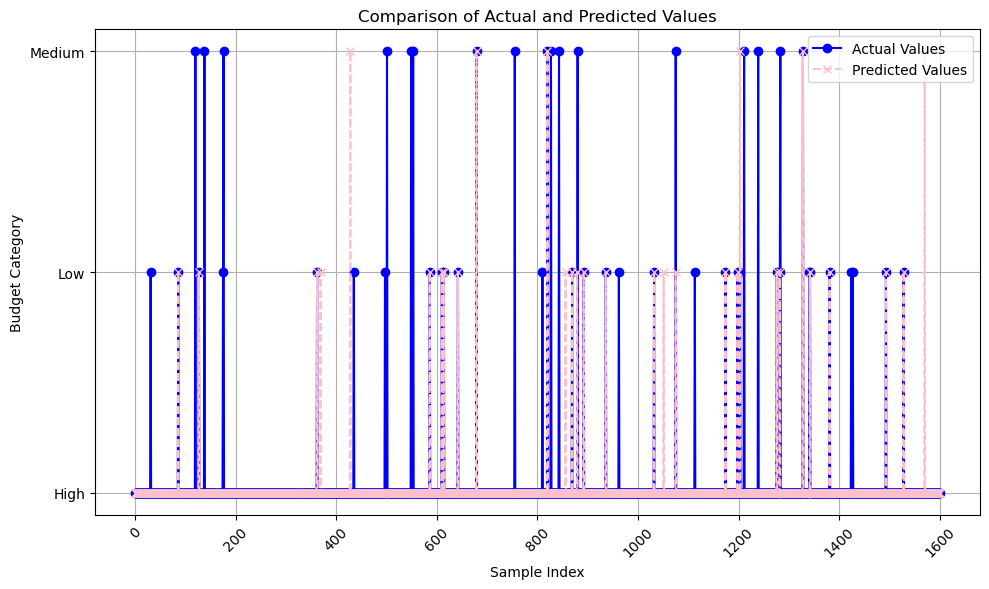

In [44]:
# Convert categorical labels back to original format
y_test_decoded = le.inverse_transform(y_test_encoded)
y_pred_knn_decoded = le.inverse_transform(y_pred_knn_encoded)

# Plot actual vs predicted values with blue and pink colors
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_decoded)), y_test_decoded, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_pred_knn_decoded)), y_pred_knn_decoded, label='Predicted Values', marker='x', linestyle='--', color='pink')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Budget Category')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 <h3>Random Forest</h3>


<p>Для аналізу результатів роботи методу Random Forest, так само як і для методу KNN, необхідно підібрати оптимальну кількість дерев у лісі (n_estimators). Для цього ініціалізуємо алгоритм Random Forest з параметрами n_estimators від 1 до 100, а потім обчислимо середню точність (mean accuracy) для кожної моделі.</p>

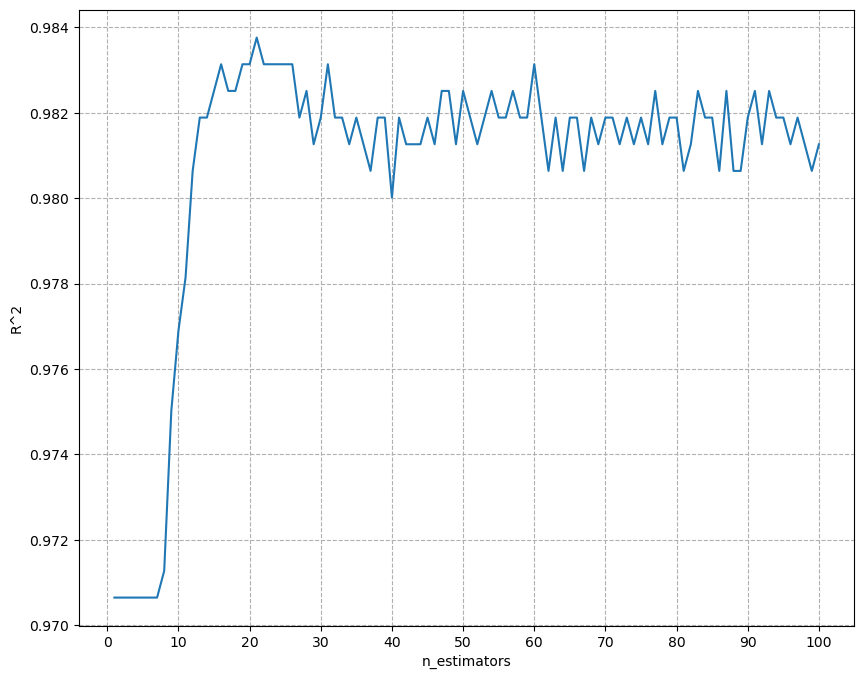

Найкраща точність: 0.9837601499063086, при n_neighbors = 21


In [45]:
accur = []
max_kernels = 100
for k in range(1, max_kernels + 1):
    randomforest = RandomForestClassifier(max_depth=k)
    randomforest.fit(x_train, y_train)
    accur.append(randomforest.score(x_test, y_test))
    
# Отримані показники якості візуалізую на графіку:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,10))
plt.xlabel('n_estimators')
plt.ylabel('R^2')
plt.grid(linestyle='--')
plt.show()

# Знаходимо найкращий показник точності та відповідне значення k
best_accuracy = max(accur)
best_k = accur.index(best_accuracy) + 1
print(f'Найкраща точність: {best_accuracy}, при n_neighbors = {best_k}')

In [46]:
randomforest = RandomForestClassifier(max_depth=best_k)
randomforest.fit(x_train, y_train)

RandomForestClassifier(max_depth=21)

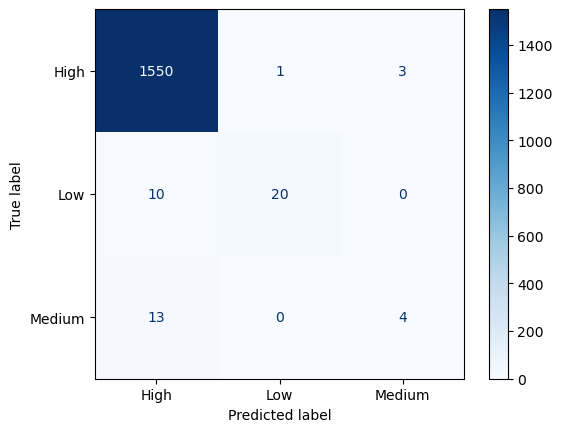

In [47]:
ConfusionMatrixDisplay.from_estimator(randomforest, x_test, y_test, cmap="Blues")
plt.grid(False)
plt.show()

In [48]:
print('Accuracy test data = ', randomforest.score(x_test, y_test))
print('Accuracy train data = ', randomforest.score(x_train, y_train))

Accuracy test data =  0.9831355402873204
Accuracy train data =  0.995159275452842


In [49]:
# Перетворення категорій на числові значення
y_pred_rf_encoded = le.transform(randomforest.predict(x_test))

# Обчислення MSE та R²
mse_rf = mean_squared_error(y_test_encoded, y_pred_rf_encoded)
r2_rf = randomforest.score(x_test, y_test)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R²: {r2_rf}')

Random Forest MSE: 0.046845721424109935
Random Forest R²: 0.9831355402873204


In [50]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score, KFold

# Перетворення категоріальних змінних у числові значення
label_encoders = {}
for column in x_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    x_train[column] = label_encoders[column].fit_transform(x_train[column])
    x_test[column] = label_encoders[column].transform(x_test[column])

randomforest = RandomForestClassifier(max_depth=16)

cv = KFold(n_splits=3, shuffle=True, random_state=1)

cv_scores = cross_val_score(randomforest, x_train, y_train, cv=cv, scoring='accuracy')

print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std()}")

Mean Cross-Validation Accuracy: 0.982511246851284
Standard Deviation of Cross-Validation Accuracy: 0.0019600032457920973


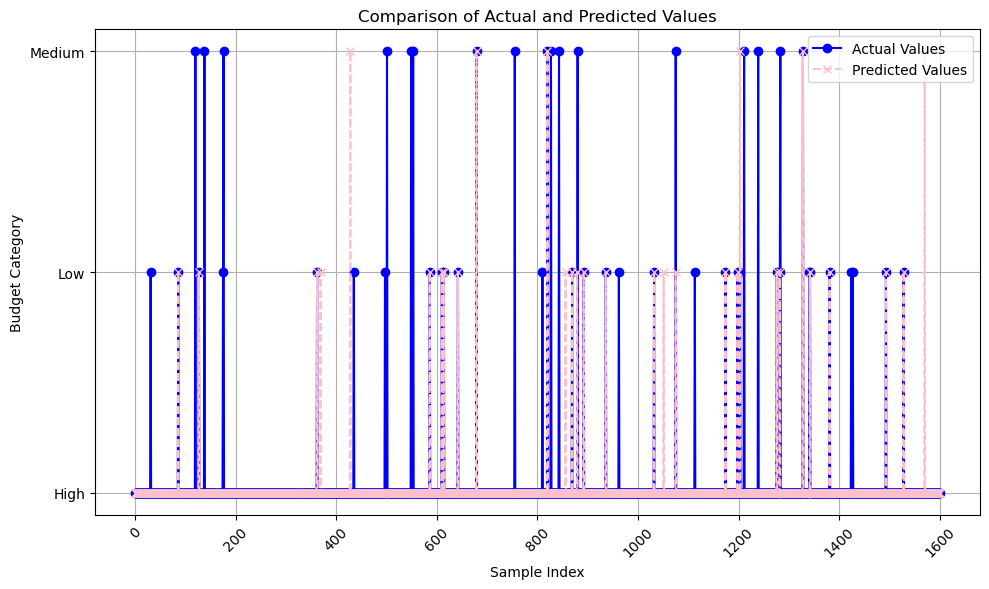

In [51]:
# Convert categorical labels back to original format
y_test_decoded = le.inverse_transform(y_test_encoded)
y_pred_rf_decoded = le.inverse_transform(y_pred_rf_encoded)

# Plot actual vs predicted values with blue and pink colors
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_decoded)), y_test_decoded, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_pred_rf_decoded)), y_pred_knn_decoded, label='Predicted Values', marker='x', linestyle='--', color='pink')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Budget Category')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()